# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/playground-series-s3e16/sample_submission.csv
/kaggle/input/playground-series-s3e16/train.csv
/kaggle/input/playground-series-s3e16/test.csv


In [3]:
train = pd.read_csv("/kaggle/input/playground-series-s3e16/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s3e16/test.csv")

In [4]:
print("train----------------------------------")
print(train.info())
print("test----------------------------------")
print(test.info())

train----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB
None
test----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49368 entries, 0 to 49367
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id

In [5]:
print(f"No of training examples = {len(train)}")
print(f"No of training examples = {len(test)}")

No of training examples = 74051
No of training examples = 49368


In [6]:
train.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [7]:
train["Sex"].value_counts()

M    27084
I    23957
F    23010
Name: Sex, dtype: int64

In [8]:
print("train-------------------------------------------------------------------------------------")
print(train.describe())
print("test--------------------------------------------------------------------------------------")
print(test.describe())

train-------------------------------------------------------------------------------------
                 id        Length      Diameter        Height        Weight  \
count  74051.000000  74051.000000  74051.000000  74051.000000  74051.000000   
mean   37025.000000      1.317460      1.024496      0.348089     23.385217   
std    21376.826729      0.287757      0.237396      0.092034     12.648153   
min        0.000000      0.187500      0.137500      0.000000      0.056699   
25%    18512.500000      1.150000      0.887500      0.300000     13.437663   
50%    37025.000000      1.375000      1.075000      0.362500     23.799405   
75%    55537.500000      1.537500      1.200000      0.412500     32.162508   
max    74050.000000      2.012815      1.612500      2.825000     80.101512   

       Shucked Weight  Viscera Weight  Shell Weight           Age  
count    74051.000000    74051.000000  74051.000000  74051.000000  
mean        10.104270        5.058386      6.723870      9.96

## Checking for null value

In [9]:
print("Train----------------------------------")
print(train.isnull().sum())
print("Test----------------------------------")
print(test.isnull().sum())

Train----------------------------------
id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64
Test----------------------------------
id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
dtype: int64


Fortunately no null values

## Remove ID columns

### Only train set, not dropping test set for now

In [10]:
train = train.drop("id", axis=1)

### Convert categorical column to numeric using one hot encoding

In [11]:
encoded_train_sex = pd.get_dummies(train["Sex"])
encoded_test_sex = pd.get_dummies(test["Sex"])

In [12]:
train = pd.concat([train, encoded_train_sex], axis=1)
test = pd.concat([test, encoded_test_sex], axis=1)

In [13]:
train

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,F,I,M
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,0,1,0
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,0,1,0
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,0,0,1
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,1,0,0
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10,1,0,0
74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6,0,1,0
74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10,1,0,0
74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8,0,1,0


### Now drop Sex column as it is not required anymore

In [14]:
train = train.drop("Sex", axis=1)
test = test.drop("Sex", axis=1)

### Store test id elsewhere and drop test id from the dataframe

In [15]:
test_id = test["id"]

In [16]:
test = test.drop("id", axis=1)

### Split the data

In [17]:
X = train.drop("Age", axis=1)
y = train["Age"]

### Scale the data

In [18]:
scaler = StandardScaler()

In [19]:
X_cols = X.columns
test_cols = test.columns

In [20]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X_cols)
test_scaled = pd.DataFrame(scaler.transform(test), columns=test_cols)

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=1)

## Visualize the testing set

In [22]:
X_train

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,F,I,M
3570,0.9125,0.7125,0.2250,6.038443,2.523105,1.148155,2.126212,0,1,0
24688,1.5000,1.1875,0.4375,32.034935,14.599993,6.435337,9.071840,0,0,1
51423,1.4375,1.1250,0.3250,22.792998,9.567956,3.983105,6.520385,0,1,0
11579,1.5625,1.2000,0.4375,38.555320,13.522711,7.739414,13.607760,1,0,0
61216,0.6875,0.5125,0.1750,3.869707,1.048931,0.680388,0.992232,0,0,1
...,...,...,...,...,...,...,...,...,...,...
20609,1.6375,1.3250,0.4375,35.819593,14.132226,9.539607,8.930093,1,0,0
21440,1.1375,0.9000,0.2875,12.785625,4.706017,2.551455,3.005047,0,1,0
73349,0.5250,0.3750,0.1125,1.346601,0.538640,0.311845,0.368544,0,1,0
50057,0.9625,0.7750,0.2500,8.065433,3.019222,2.126212,2.834950,0,0,1


In [23]:
merged_X_y_train = pd.concat([X_train, y_train], axis=1)

<Axes: xlabel='Length', ylabel='Age'>

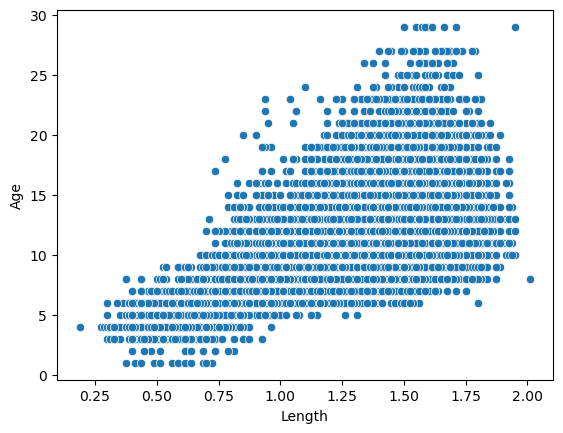

In [25]:
sns.scatterplot(x="Length", y="Age", data=merged_X_y_train)

### Making a simple linear regression model for now

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(X_valid)

In [29]:
score = mean_absolute_error(y_valid, y_pred)
print(score)

1.4775987922722635


### Use the validation data for training

In [30]:
lr.fit(X_scaled, y)

LinearRegression()

In [31]:
test_pred = lr.predict(test_scaled)

In [32]:
res = pd.read_csv("/kaggle/input/playground-series-s3e16/sample_submission.csv")

In [33]:
res["Age"] = test_pred

In [34]:
res["Age"] = res["Age"].astype(int)

In [35]:
res

,id,Age
0,74051,7
1,74052,7
2,74053,10
3,74054,9
4,74055,7
...,...,...
49363,123414,9
49364,123415,7
49365,123416,12
49366,123417,10


In [ ]:
res.to_csv('submission.csv', index=False)